In [1]:
import math
import numpy as np
from numpy import random
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import DBSCAN

In [2]:
# Functions to generate list of points, with coordinate and labels

def generate_point_labels(count):
    num1, num2 = 1, 1
    l = []
    for i in range(count):
        l.append(str(num1) + '.' + str(num2))
        if (random.random() > 0.9):
            num1, num2 = num1 + 1, 1
        else:
            num2 = num2 + 1
    return l

def generate_points(count):
    X = random.random(count)
    Y = random.random(count)
    labels = generate_point_labels(count)
    
    points = list(zip(labels, X, Y))
    df = pd.DataFrame(points, columns=['label', 'x', 'y'])
    
    return df

In [24]:
points = generate_points(50)

In [25]:
points

,label,x,y
0,1.1,0.856466,0.248833
1,1.2,0.555044,0.871620
2,1.3,0.911451,0.666337
3,1.4,0.522323,0.995905
4,1.5,0.901211,0.002750
5,1.6,0.415978,0.238158
6,2.1,0.589859,0.038600
7,2.2,0.951709,0.190633
8,2.3,0.836716,0.907884
9,2.4,0.084170,0.808323


In [20]:
# Functions to perform clustering

def cluster_points_by_dbscan(points):
    clustering = DBSCAN(eps=0.2, min_samples=2).fit(points)
    points['cluster'] = clustering.labels_
    return points

def extract_clusters(points):
    cluster_nos = list(set(points.cluster))
    X, Y, labels, long_labels, counts = [], [], [], [], []
    
    for i in range(0, len(cluster_nos)-1):
        c = cluster_nos[i]
        X.append(points[points.cluster == c].x.mean())
        Y.append(points[points.cluster == c].y.mean())
        labels.append('#' + str(c+1))
        long_labels.append(points[points.cluster == c].label.str.cat(sep=', '))
        counts.append(len(points[points.cluster == c]))
        
    return pd.DataFrame(zip(labels, X, Y, long_labels, counts), columns=['label','x','y','long_label','count']) 

In [21]:
# Functions to plot points and labels

def plot_points(img, points):
    plt.figure(figsize=(20,10))
    plt.scatter(points.x * img.shape[1], points.y * img.shape[0], c=points.cluster, s=500, marker="*", cmap="rainbow")
    plt.colorbar()
    
def plot_labels(img, points, clusters):
    for i in range(len(points)):
        if points.cluster[i] == -1:
            plt.text(points.x[i] * img.shape[1], points.y[i] * img.shape[0], points.label[i], 
                     horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.8))

    for i in range(len(clusters)):
        plt.text(clusters.iloc[i].x * img.shape[1], clusters.iloc[i].y * img.shape[0], clusters.iloc[i].label, 
                 horizontalalignment='center', bbox=dict(facecolor='red', alpha=0.6))

def plot_all(img, points, clusters):
    plot_points(img, points)
    plot_labels(img, points, clusters)
    plt.imshow(img)
    plt.show()

In [22]:
# Function to execute a single program flow for floorplan point clustering with given "point_count".

def run(point_count):
    print("Point Count = " + str(point_count))
    print('==================')
    
    img = mpimg.imread("floorplan.png")
    points = generate_points(point_count)
    points = cluster_points_by_dbscan(points)
    clusters = extract_clusters(points)

    plot_all(img, points, clusters) 
    print(clusters[['label', 'long_label', 'count']].to_string(index=False))
    
    print('\n\n\n')

Point Count = 50


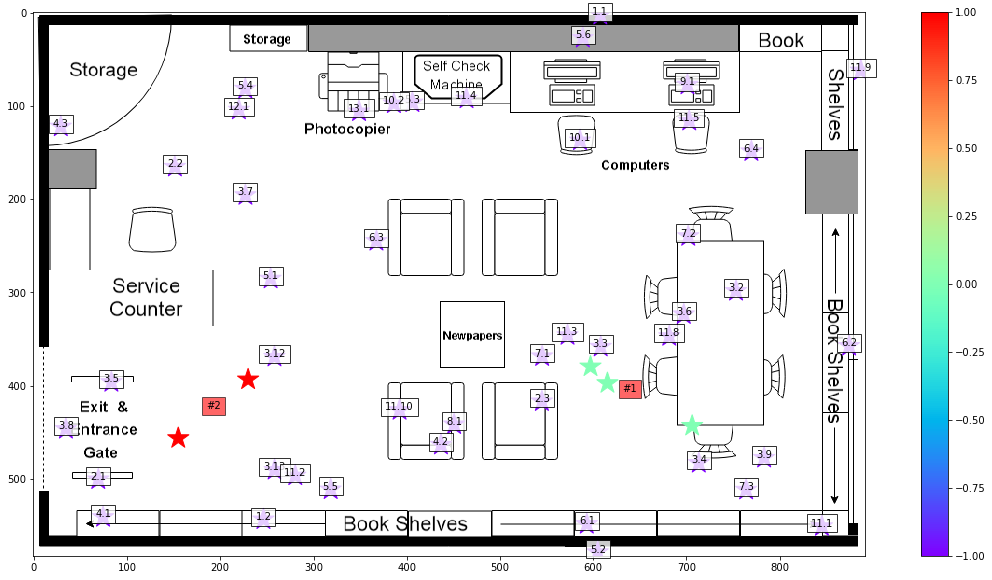

label       long_label  count
   #1  3.1, 3.10, 3.11      3
   #2       11.6, 11.7      2






In [23]:
# Main Program Flow
# run(25)
run(50)
# run(100)
# run(200)
# run(500)
# run(1000)